<a href="https://colab.research.google.com/github/LIvanoff/Big-Data-analysis-technologies-and-tools/blob/main/pr2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.8/90.8 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 11.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.4-py3-none-any.whl size=86770 sha256=5a8a65e52886dc72c870fc4c0ca7ed7ba73579eb5534e7b4288c7d9d39b42a54
  Stored in directory: /root/.cache/pip/wheels/fb/66/29/199acf5784d0f7b8add6d466175ab45506c96e386ed5dd0633
  Created wheel for pynndescent: filename=pynndescent-0.5.10-py3-none-any.whl size=55615 sha256=ae6200adb1ccf3805ae33915eb04e69e975071e510fae2f0480e2b20d9298b14
  Stored in directory: /root/.cache/pip/wheels/4a/38/5d/f60a40a66a9512b7e5e83517ebc2d1b42d857be97d135f1096
Successfully built umap-learn pynndescent


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import plotly
import plotly.graph_objs as go
import plotly.express as px
from sklearn import preprocessing
from sklearn.manifold import TSNE
import seaborn as sns
import umap

### Задание 1-2

Найти и выгрузить многомерные данные (с большим количеством
признаков – столбцов) с использованием библиотеки pandas. В отчёте
описать найденные данные.
Вывести информацию о данных при помощи методов .info(), .head().
Проверить данные на наличие пустых значений. В случае их наличия
удалить данные строки или интерполировать пропущенные значения.
При необходимости дополнительно предобработать данные для
дальнейшей работы с ними.

In [ ]:
df = pd.read_csv('dataset.csv')
df = df.drop('Unnamed: 0', axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74929 entries, 0 to 74928
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   mapName               74929 non-null  object
 1   roundNum              74929 non-null  int64 
 2   tScore                74929 non-null  int64 
 3   ctScore               74929 non-null  int64 
 4   endTScore             74929 non-null  int64 
 5   endCTScore            74929 non-null  int64 
 6   ctTeam                74917 non-null  object
 7   tTeam                 74918 non-null  object
 8   roundEndReason        74929 non-null  object
 9   ctFreezeTimeEndEqVal  74929 non-null  int64 
 10  ctRoundStartEqVal     74929 non-null  int64 
 11  ctRoundSpendMoney     74929 non-null  int64 
 12  ctBuyType             74929 non-null  object
 13  tFreezeTimeEndEqVal   74929 non-null  int64 
 14  tRoundStartEqVal      74929 non-null  int64 
 15  tRoundSpendMoney      74929 non-null

In [ ]:
df.head()

mapName  roundNum  tScore  ctScore  endTScore  endCTScore   ctTeam  \
0  de_ancient         1       0        0          0           1  LDLC OL   
1  de_ancient         2       0        1          0           2  LDLC OL   
2  de_ancient         3       0        2          0           3  LDLC OL   
3  de_ancient         4       0        3          1           3  LDLC OL   
4  de_ancient         5       1        3          2           3  LDLC OL   

      tTeam roundEndReason  ctFreezeTimeEndEqVal  ctRoundStartEqVal  \
0  Team 500    BombDefused                4300.0             1000.0   
1  Team 500          CTWin               21550.0             3350.0   
2  Team 500          CTWin               23400.0            18800.0   
3  Team 500   TargetBombed               30700.0             9950.0   
4  Team 500   TargetBombed               22950.0             5400.0   

   ctRoundSpendMoney ctBuyType  tFreezeTimeEndEqVal  tRoundStartEqVal  \
0             3300.0  Full Eco               5000.0            1000.0   
1            19500.0  Full Buy              14450.0            1000.0   
2             4800.0  Full Buy               2500.0            1000.0   
3            20950.0  Full Buy              24400.0            1000.0   
4            18550.0  Full Buy              27250.0           14750.0   

   tRoundSpendMoney  tBuyType winningSide winningTeam losingTeam  
0            3300.0  Semi Eco          CT     LDLC OL   Team 500  
1           14050.0  Semi Buy          CT     LDLC OL   Team 500  
2            3750.0  Full Eco          CT     LDLC OL   Team 500  
3           23600.0  Full Buy           T    Team 500    LDLC OL  
4           12500.0  Full Buy           T    Team 500    LDLC OL

In [ ]:
map_name = df['mapName'].unique()
winning_side = df.loc[0:1000,'winningSide'].unique()
map_name, winning_side

(array(['de_ancient', 'de_anubis', 'de_inferno', 'de_mirage',
        'de_overpass', 'de_nuke', 'de_vertigo'], dtype=object),
 array(['CT', 'T'], dtype=object))

In [ ]:
ct_list = []
t_list = []
for map in map_name:
  ct_list.append(df[(df['mapName'] == map) & (df['winningSide'] == 'CT')].shape[0] / df[df['mapName'] == map].shape[0])
  t_list.append(df[(df['mapName'] == map) & (df['winningSide'] == 'T')].shape[0] / df[df['mapName'] == map].shape[0])


### Задание 3

Построить столбчатую диаграмму (.bar) с использованием модуля
graph_objs из библиотеки Plotly с

In [ ]:
import plotly.graph_objects as go

fig = go.Figure(data=[
    go.Bar(name='CT', x=map_name, y=ct_list, marker=dict(line=dict(color='black', width=2))), # , marker=dict(color=ct_list, coloraxis="coloraxis", line=dict(color='black', width=2))
    go.Bar(name='T', x=map_name, y=t_list, marker=dict(line=dict(color='black', width=2))) # color=t_list, coloraxis="coloraxis",
])
# Change the bar mode
fig.update_layout(title = 'Процент побед на картах',
                  title_y = 0.96,
                  title_x = 0.55,
                  title_xanchor = 'center',
                  title_yanchor = 'top',
                  title_font_size = 20,
                  xaxis=dict(showgrid=True, gridwidth=1, gridcolor='ivory', title=dict(text="Победы, %", font=dict(size=16)), tickfont=dict(size=14), tickangle=315),
                  yaxis=dict(showgrid=True, gridwidth=1, gridcolor='ivory', title=dict(text="Карты", font=dict(size=16)), tickfont=dict(size=14)),
                  xaxis_title = 'Карты',
                  xaxis_title_font_size = 16,
                  yaxis_title = 'Победы, %',
                  yaxis_title_font_size = 16
                  )
fig.show()

### Задание 4

Построить круговую диаграмму (go.Pie), использовав данные и стиль
оформления из предыдущего графика. Сделать так, чтобы границы
каждой доли были выделены чёрной линией с толщиной, равной 2 и
категории круговой диаграммы были читаемы (к примеру, объединить
часть объектов)

In [ ]:
values = df['mapName'].value_counts()
go_fig = go.Figure()

obj = go.Pie(labels = map_name, values = values, marker=dict(line=dict(color='black', width=2)))
go_fig.add_trace(obj)
go_fig.update_layout(title = 'Процент игр на картах',
                  title_y = 0.96,
                  title_x = 0.47,
                  title_xanchor = 'center',
                  title_yanchor = 'top',
                  title_font_size = 20,
                  # xaxis=dict(showgrid=True, linewidth=2, gridcolor='mistyrose'),
                  # yaxis=dict(showgrid=True, linewidth=2, gridcolor='mistyrose'),
                  xaxis_title = 'Карты',
                  xaxis_title_font_size = 16,
                  yaxis_title = 'Победы, %',
                  yaxis_title_font_size = 16
                  )

go_fig.show()

### Задание 5

Построить линейные графики, взять один из параметров и определить
зависимость между другими несколькими (от 2 до 5) показателями с
использованием библиотеки matplotlib. Сделать вывод.

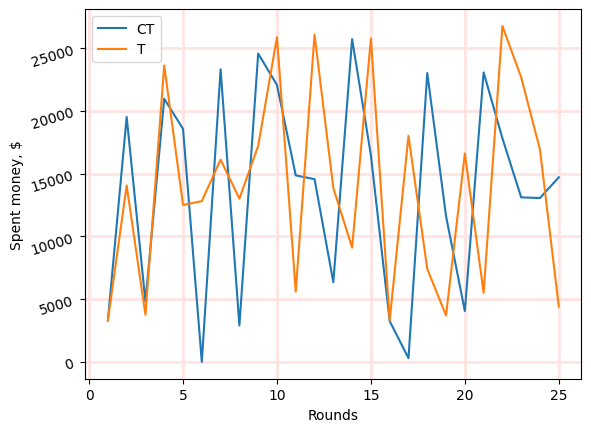

In [ ]:
rounds = 25
x = df['roundNum'].to_numpy()
y1 = df['ctRoundSpendMoney'].to_numpy()
y2 = df['tRoundSpendMoney'].to_numpy()
plt.plot(x[:rounds], y1[:rounds], label='CT')
plt.plot(x[:rounds], y2[:rounds], label='T')
plt.xlabel('Rounds')
plt.ylabel('Spent money, $')
plt.yticks(rotation = 17)
plt.grid(linewidth=2, color='mistyrose')
plt.legend()

### Задача 6

Выполнить визуализацию многомерных данных, используя t-SNE.

In [ ]:
drop_list = ['mapName', 'ctTeam', 'tTeam', 'roundEndReason', 'ctBuyType', 'tBuyType', 'winningTeam', 'losingTeam']
data = df.drop(drop_list, axis=1)
data.loc[data.winningSide == 'CT'] = 1
data.loc[data.winningSide == 'T'] = 0
data

roundNum  tScore  ctScore  endTScore  endCTScore  ctFreezeTimeEndEqVal  \
0             1       1        1          1           1                     1   
1             1       1        1          1           1                     1   
2             1       1        1          1           1                     1   
3             0       0        0          0           0                     0   
4             0       0        0          0           0                     0   
...         ...     ...      ...        ...         ...                   ...   
74924         0       0        0          0           0                     0   
74925         0       0        0          0           0                     0   
74926         0       0        0          0           0                     0   
74927         1       1        1          1           1                     1   
74928         1       1        1          1           1                     1   

       ctRoundStartEqVal  ctRoundSpendMoney  tFreezeTimeEndEqVal  \
0                      1                  1                    1   
1                      1                  1                    1   
2                      1                  1                    1   
3                      0                  0                    0   
4                      0                  0                    0   
...                  ...                ...                  ...   
74924                  0                  0                    0   
74925                  0                  0                    0   
74926                  0                  0                    0   
74927                  1                  1                    1   
74928                  1                  1                    1   

       tRoundStartEqVal  tRoundSpendMoney winningSide  
0                     1                 1           1  
1                     1                 1           1  
2                     1                 1           1  
3                     0                 0           0  
4                     0                 0           0  
...                 ...               ...         ...  
74924                 0                 0           0  
74925                 0                 0           0  
74926                 0                 0           0  
74927                 1                 1           1  
74928                 1                 1           1  

[74929 rows x 12 columns]

In [ ]:
index_names = data[ data['winningSide'] == 'Unknown' ].index
data = data.drop(index_names, axis=0)
data['winningSide'].unique()

array([1, 0], dtype=object)

In [ ]:
T = TSNE(n_components=2, perplexity=5, random_state=42)
TSNE_features = T.fit_transform(data)

In [ ]:
TSNE_features.shape

(74928, 2)

In [ ]:
DATA = data.copy()
DATA['x'] = TSNE_features[:,0]
DATA['y'] = TSNE_features[:,1]

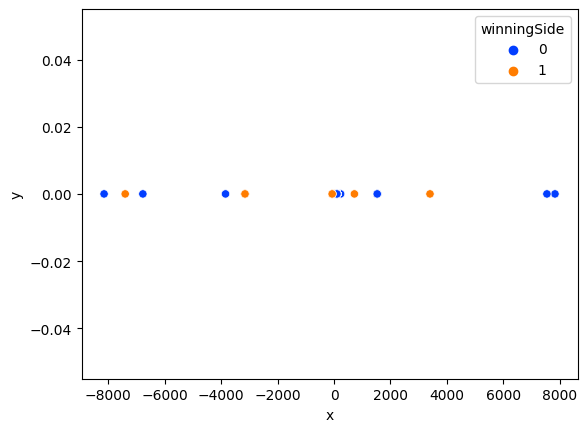

In [ ]:
fig = plt.figure()
sns.scatterplot(x='x', y='y', hue=data['winningSide'],data=DATA, palette='bright')
plt.show()

### Задача 7

Выполнить визуализацию многомерных данных, используя UMAP с
различными параметрами n_neighbors и min_dist.

In [ ]:
n_n = (5, 25, 50)
m_d = (0.1, 0.6)

In [ ]:
um = dict()
for i in range(len(n_n)):
  for j in range(len(m_d)):
    um[(n_n[i], m_d[j])] = (umap.UMAP(n_neighbors=n_n[i], min_dist=m_d[j], random_state=42).fit_transform(data))

Text(0.5, 1.0, 'UMAP (n_neighbors=50, min_dist=0.6)')

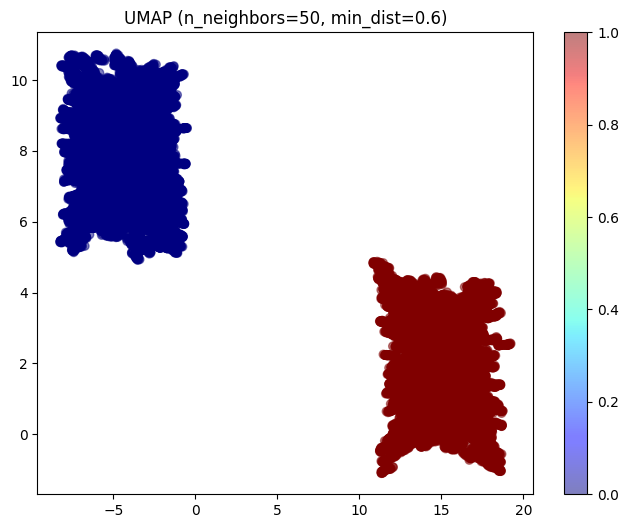

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(um[(50, 0.6)][:,0], um[(50, 0.1)][:,1], c=data['winningSide'], cmap="jet", alpha=0.5)
plt.colorbar()
plt.title(f"UMAP (n_neighbors=50, min_dist=0.6)")

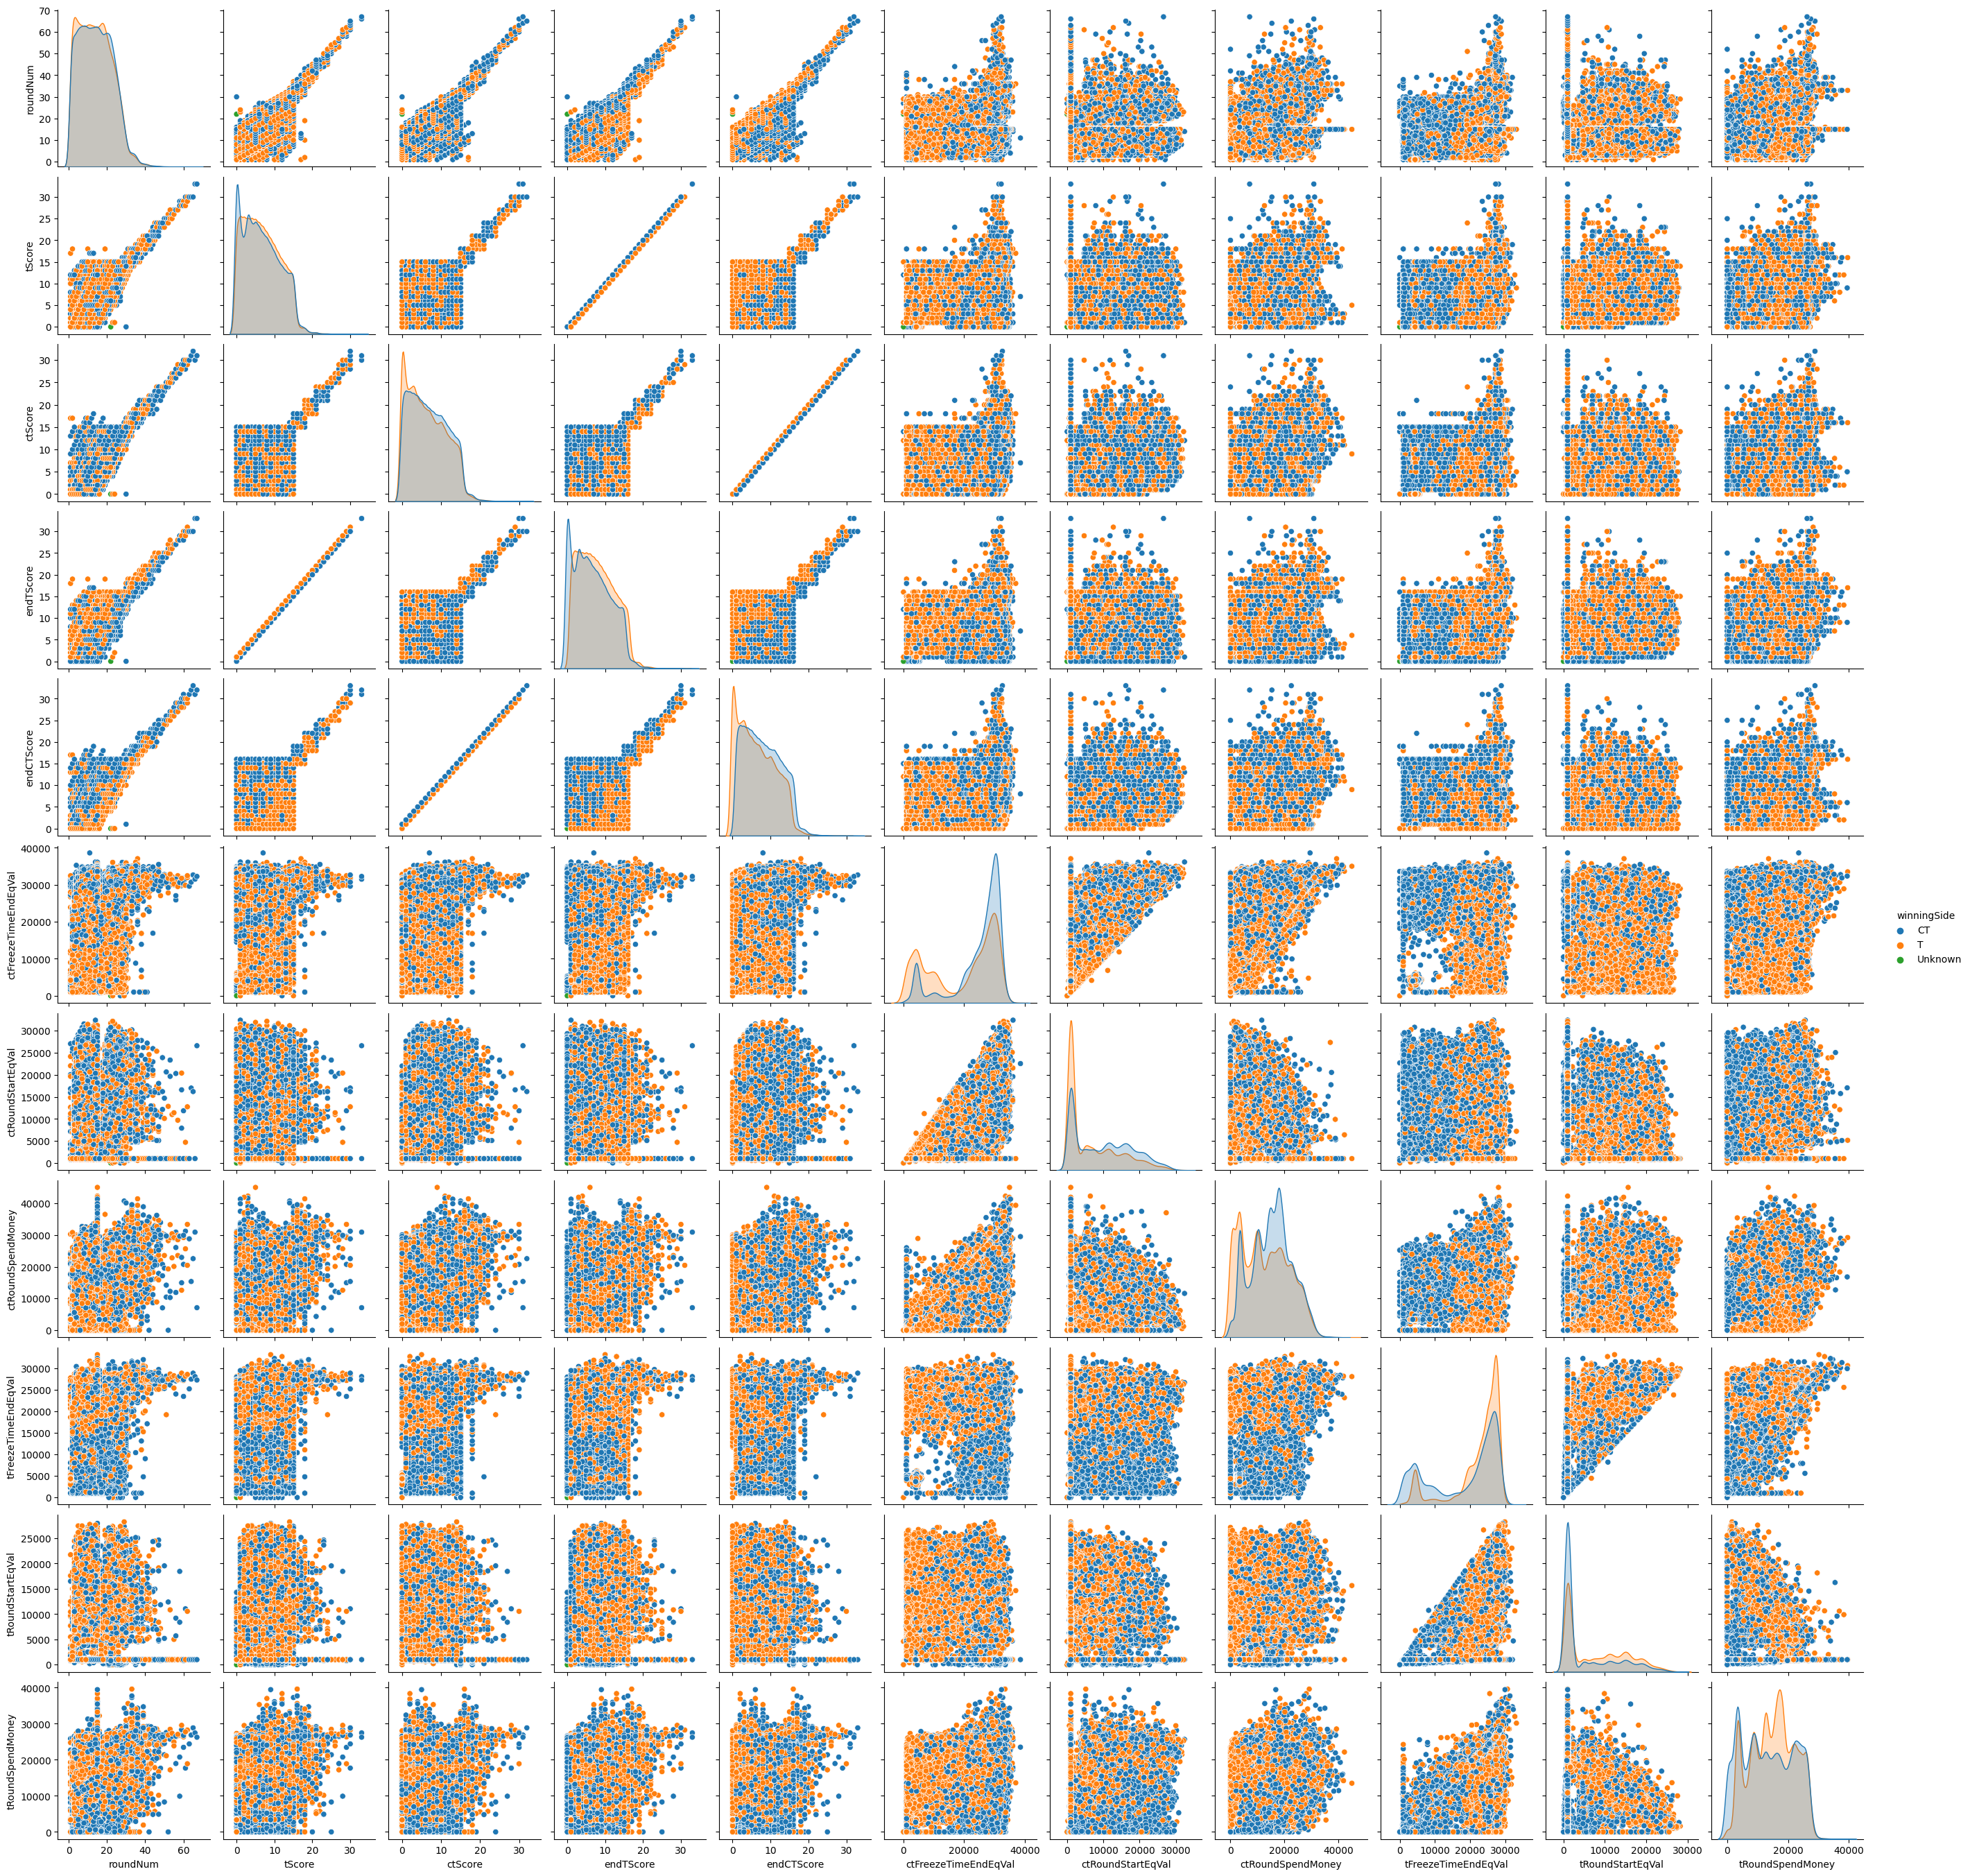

In [ ]:
sns.pairplot(df, hue='winningSide')